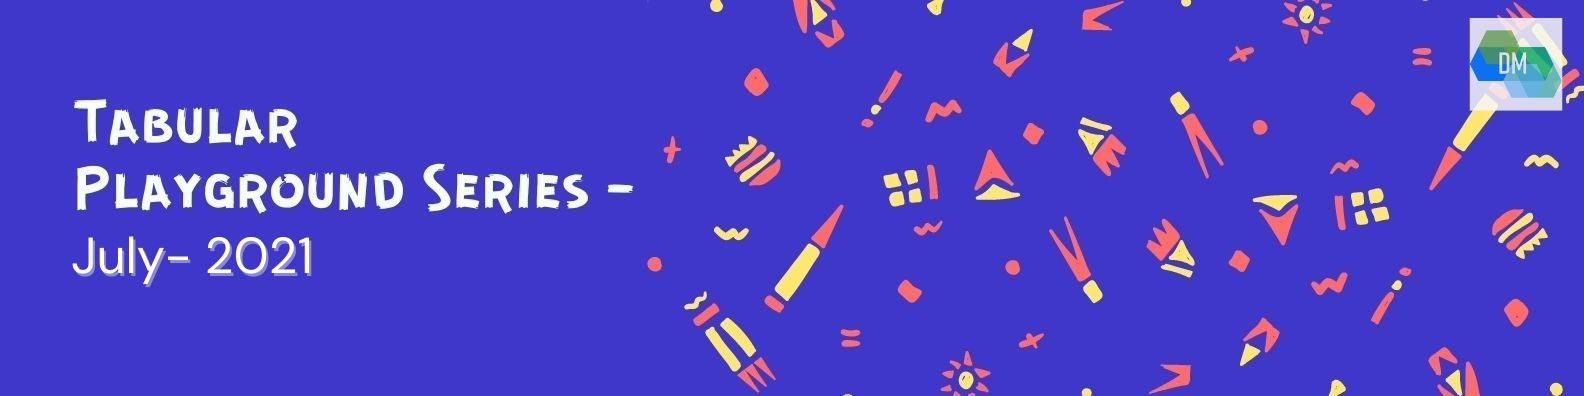

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train= pd.read_csv("../input/tabular-playground-series-jul-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-jul-2021/test.csv")

In [ ]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
print(f"Starting Date (Train) {df_train['date_time'].min()}")
print(f"Ending Date (Train) {df_train['date_time'].max()}")

In [ ]:
print(f"Starting Date (Test) {df_test['date_time'].min()}")
print(f"Ending Date (Test) {df_test['date_time'].max()}")

In [ ]:
df_train['date_time'] = df_train['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9
df_test['date_time'] = df_test['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(14,18))
axs = axs.flatten()
sns.distplot(df_train['sensor_1'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_train['sensor_2'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_train['sensor_3'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_train['sensor_4'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_train['sensor_5'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_train['relative_humidity'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_train['absolute_humidity'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_train['deg_C'],rug=True,color='#333533',ax=axs[7])
plt.show()

In [ ]:
plt.figure(figsize=(11,11))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

In [ ]:
sns.distplot(df_train['target_carbon_monoxide'],color='#f77f00')

In [ ]:
import math
from scipy.stats import norm, skew

df_train['target_carbon_monoxide'] = np.log1p(df_train['target_carbon_monoxide'])
sns.distplot(df_train['target_carbon_monoxide'], fit=norm,color='#f77f00');

In [ ]:
sns.distplot(df_train['target_benzene'],color='#240046')

In [ ]:
df_train['target_benzene'] = np.log1p(df_train['target_benzene'])
sns.distplot(df_train['target_benzene'], fit=norm,color='#240046');

In [ ]:
sns.distplot(df_train['target_nitrogen_oxides'],color='#006400')

In [ ]:
df_train['target_nitrogen_oxides'] = np.log1p(df_train['target_nitrogen_oxides'])
sns.distplot(df_train['target_nitrogen_oxides'], fit=norm,color='#006400');

In [ ]:
cols = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
sns.pairplot(df_train[cols])

In [ ]:
targets = ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']

In [ ]:
df_train['target_carbon_monoxide'] = df_train['target_carbon_monoxide'].values.reshape(-1, 1)
df_train['target_benzene'] = df_train['target_benzene'].values.reshape(-1,1)
df_train['target_nitrogen_oxides'] = df_train['target_nitrogen_oxides'].values.reshape(-1,1)

In [ ]:
# define dataset
X = df_train.drop(targets, axis=1).values
y = df_train[targets].values

In [ ]:
X.shape,y.shape

In [ ]:
# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Work in progress </centre></strong></h3>